<a href="https://colab.research.google.com/github/avawaxenberg/FDSfE_AWaxenberg/blob/main/HW7/sentiment_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import all necessary functions to read data

In [34]:
import os
import json
import pandas as pd

import numpy as np
import pylab as plt
import seaborn as sns

In [35]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
Replace "kaggle.json" file with copying path from kaggle json in drive to properly read

In [37]:
env = json.load(open("/content/drive/MyDrive/kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = env["username"]
os.environ["KAGGLE_KEY"] = env["key"]

In [38]:
!kaggle datasets sentiment

usage: kaggle datasets
       [-h]
       {list,files,download,create,version,init,metadata,status}
       ...
kaggle datasets: error: argument command: invalid choice: 'sentiment' (choose from 'list', 'files', 'download', 'create', 'version', 'init', 'metadata', 'status')


In [39]:
!mkdir sentimentanalysis

mkdir: cannot create directory ‘sentimentanalysis’: File exists


In [40]:
cd sentimentanalysis/

/content/drive/MyDrive/sentimentanalysis


In [41]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 98.4MB/s]


In [42]:
!ls *

sentiment-analysis-on-movie-reviews.zip


In [ ]:
*May not be necessary* !unzip -o to properly read file since I did not use just "kaggle.json"

In [43]:
!unzip -o  sentiment-analysis-on-movie-reviews.zip

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: sampleSubmission.csv    
  inflating: test.tsv.zip            
  inflating: train.tsv.zip           


In [ ]:
Define reviews for sentiment of movies database

In [44]:
reviews = pd.read_csv("train.tsv.zip", sep="\t")
reviews

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [45]:
reviews.shape

(156060, 4)

Specificy which columns of the reviews database are important for idenitifying and running their values

In [46]:
reviews[["Phrase", "Sentiment"]].values

array([['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
        1],
       ['A series of escapades demonstrating the adage that what is good for the goose',
        2],
       ['A series', 2],
       ...,
       ['avuncular chortles', 3],
       ['avuncular', 2],
       ['chortles', 2]], dtype=object)

Import numpy to print specific tasks within the database and create arrays 

In [47]:
import numpy as np
print('Number of Reviews/Documents: {}'.format(len(reviews)))

print('Corpus Size (words): {}'.format(np.sum([len(d.split()) 
              for d in reviews["Phrase"].values])))

Number of Reviews/Documents: 156060
Corpus Size (words): 1124157


In [48]:
reviews.Sentiment.unique()

array([1, 2, 3, 4, 0])

Create graph to display the set of movie reviews within the certain set of bins 

(array([ 7072., 27273., 79582., 32927.,  9206.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
 <a list of 5 Patch objects>)

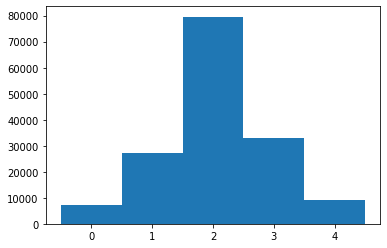

In [49]:
import pylab as plt
plt.hist(reviews["Sentiment"], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5])

In [50]:
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=a3acd4998a40265d43f9317f2b194fa8e894291aff048abdf7eaeae907144cd7
  Stored in directory: /root/.cache/pip/wheels/eb/03/0d/3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062
Successfully built stop-words


In [51]:
import nltk 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from stop_words import get_stop_words
from textblob import TextBlob , Word
import re 
import string

In [52]:
from nltk.tokenize import word_tokenize

In [53]:
!python -m nltk.downloader punkt

/usr/lib/python3.8/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [54]:
from nltk.tokenize import word_tokenize

"Token" the reviews function from streams of words into phrases and numbers of words/phrases 

In [55]:
reviews['Phrase'] = reviews['Phrase'].str.lower(
    ).str.replace('[^\w\s]', '').str.replace('\d+',
                    '').str.replace('\n',' ').replace(
                        '\r','').str.replace(
                            "[^a-zA-Z0-9\s]",'') 

<ipython-input-55-cc559fd93f41>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews['Phrase'] = reviews['Phrase'].str.lower(


In [56]:
reviews['Phrase'] = reviews['Phrase'].apply(lambda x : 
                  word_tokenize(x.lower())) # sentence -> words
reviews['Phrase']

0         [a, series, of, escapades, demonstrating, the,...
1         [a, series, of, escapades, demonstrating, the,...
2                                               [a, series]
3                                                       [a]
4                                                  [series]
                                ...                        
156055                                          [hearst, s]
156056                        [forced, avuncular, chortles]
156057                                [avuncular, chortles]
156058                                          [avuncular]
156059                                           [chortles]
Name: Phrase, Length: 156060, dtype: object

The word cloud, after being "tokenized" from a stream into phrases, takes the words in this "cloud" and lists them as STOPWORDS

In [57]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [58]:
reviews["Phrase"] = reviews["Phrase"].apply(lambda x : 
                  [word for word in x if word not in STOPWORDS])

Use seaborn to plot/graph/design these stopwords from the word cloud into an image 

In [59]:
import seaborn as sns

Define word frequency and the top 10 most common words from the word cloud/stopwords and plot graph as a visual based on frequency of most commonly used words in word cloud

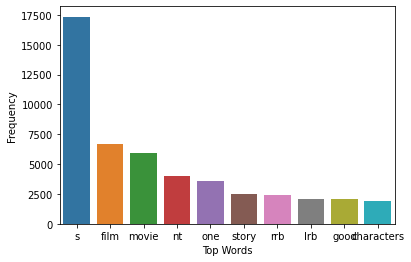

In [61]:
words_freq = pd.DataFrame(nltk.FreqDist(reviews.Phrase.sum(
                                          )).most_common(10), 
                          columns=['Top Words', 'Frequency'])
sns.barplot(x="Top Words",y="Frequency",data=words_freq)

In [62]:
reviews["Phrase"] = reviews["Phrase"].apply(lambda x : 
                  [word for word in x if word not in 
                   ["s", "nt", "rrb", "lrb", "one"]])

In [ ]:
words_freq = pd.DataFrame(nltk.FreqDist(reviews.Phrase.sum(
                                          )).most_common(10), 
                          columns=['Top Words', 'Frequency'])
ax = sns.barplot(x="Top Words",y="Frequency",data=words_freq)
plt.xticks(rotation = 45)

Plot word frequency into a visual word cloud of top 10 most common words

In [ ]:
import pylab as plt
def wc(data,bgcolor): # word cloud
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor,max_words=100, 
                 min_word_length=4, contour_width=3, 
                 contour_color='steelblue')
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")
wc(reviews[reviews.Sentiment==0.0].Phrase.sum(), 'white')

In [ ]:
wc(reviews[reviews.Sentiment==4.0].Phrase.sum(), 'white')

In [ ]:
!pip install vaderSentiment

The point of Vader Sentiment is to essentially "read" the words from te word cloud/stopwords based on context of emotion and polarity 

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()
sid_obj.polarity_scores("series escapades demonstrating adage good goose good gander occasionally amuses none amounts much story")

In [ ]:
sid_obj = SentimentIntensityAnalyzer()
sentiment_dict = sid_obj.polarity_scores(' '.join(reviews.Phrase[3]))
print(sentiment_dict['compound'])

Input [value] to read the vader sentiment of each word being ran/read

In [ ]:
reviews.Sentiment[3]

In [ ]:
def sentiment_vader(words):
  sid_obj = SentimentIntensityAnalyzer()
  sentiment_dict = sid_obj.polarity_scores(' '.join(words))
  return sentiment_dict['compound']

In [ ]:
for i in reviews.index[:10]:
  print(sentiment_vader(reviews.Phrase[i]), reviews.Sentiment[i])

In [ ]:
y = [sentiment_vader(reviews.Phrase[i]) for i in reviews.index]

In [ ]:
reviews[reviews.Sentiment == 0].Sentiment.values

Create array to read what generated/ran from the value inputted for vader sentiment 

In [ ]:
y = np.array(y)

Plot array in a certain value within a range 

In [ ]:
plt.errorbar(range(5), 
             [y[reviews.Sentiment == i].mean() for i in range(5)],
             yerr = [y[reviews.Sentiment == i].std() for i in range(5)],
             fmt='.')
plt.xlabel("Review")
plt.ylabel("Prediction")

In [ ]:
[y[reviews.Sentiment == i].mean() for i in range(5)]